# 1) 데이터 읽기

In [13]:
import pandas as pd

df = pd.read_csv('./diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 2) 결측치 확인

In [14]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 3) 클래스 갯수 확인 (그래프, 레이블 갯수)

Text(0.5, 1.0, 'Diabetes or NOt')

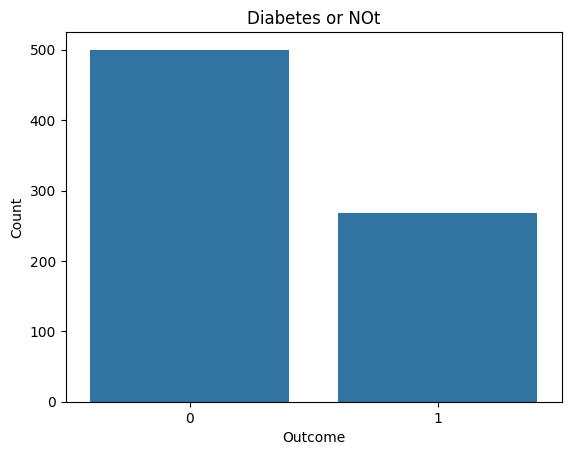

In [15]:
# 레이블 갯수 확인 (그래프)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Diabetes or NOt")

In [16]:
# 레이블 갯수 확인 (숫자)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# 5) X, Y 나누기

In [17]:
X = df.drop('Outcome', axis = 1)
Y = df['Outcome']

print(X.head())
print()
print(Y.value_counts())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

Outcome
0    500
1    268
Name: count, dtype: int64


# 6) 데이터 스케일링

In [18]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler


scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled_data,
                            index = X.index,
                            columns = X.columns) 

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


# 7) Train데이터, Test데이터 나누기

In [19]:
# split X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# 8) 모델 정의, 학습, 예측

## Support Vector Machine

In [20]:
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, Y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(Y_test, pred_svm))
print(confusion_matrix(Y_test, pred_svm))


--- SVM Classifier ---
0.7922077922077922
[[96 11]
 [21 26]]


## Linear Regression

In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

# 학습
clf.fit(X_train, Y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(Y_test, y_pred))
print (confusion_matrix(Y_test, y_pred))


--- Logistic Regression Classifier ---
0.8246753246753247
[[98  9]
 [18 29]]


## Random Forest

In [22]:
# RandomForest

from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf = RandomForestClassifier(random_state=0)

# 학습
clf.fit(X_train, Y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
print ("\n--- RandomForest Classifier ---")
print (accuracy_score(Y_test, y_pred))
print (confusion_matrix(Y_test, y_pred))


--- RandomForest Classifier ---
0.7857142857142857
[[92 15]
 [18 29]]


## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

clf = DecisionTreeClassifier(random_state = 0)

# 학습
clf.fit(X_train, Y_train)

# 테스트 데이터로 예측
y_pred= clf.predict(X_test)

# 정확도 계산
print ("\n--- DecisionTree Classifier ---")
print (accuracy_score(Y_test, y_pred))
print (confusion_matrix(Y_test, y_pred))


--- DecisionTree Classifier ---
0.7597402597402597
[[86 21]
 [16 31]]


## KNN

In [45]:
from sklearn.neighbors import KNeighborsRegressor

for i in range(1, 6) : # neighbor의 갯수를 다양하게 실험
    clf = KNeighborsRegressor(n_neighbors = i)

    # 학습
    clf.fit(X_train, Y_train)

    # 테스트 데이터로 예측
    y_pred= clf.predict(X_test)


    # 확률에 가장 가까운 정수로 class를 예측
    y_pred_class = np.around(y_pred)

    # 정확도 계산
    print ("\n--- KNN Classifier (n_neighbors = {0}) ---".format(i))
    print (accuracy_score(Y_test, y_pred_class))
    print (confusion_matrix(Y_test, y_pred_class))


--- KNN Classifier (n_neighbors = 1) ---
0.7207792207792207
[[88 19]
 [24 23]]

--- KNN Classifier (n_neighbors = 2) ---
0.7662337662337663
[[101   6]
 [ 30  17]]

--- KNN Classifier (n_neighbors = 3) ---
0.7467532467532467
[[89 18]
 [21 26]]

--- KNN Classifier (n_neighbors = 4) ---
0.7857142857142857
[[102   5]
 [ 28  19]]

--- KNN Classifier (n_neighbors = 5) ---
0.8051948051948052
[[94 13]
 [17 30]]
